### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd

TensorFlow 2.x selected.


In [2]:
tf.__version__

'2.1.0-rc1'

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
##df_salary = pd.read_hdf('SVHN_single_grey1.h5')
##df_salary.head(10)
#/content/drive/My Drive/PGPAIML/4 Jan 2020/Assignment/Project/

#df_data = pd.read_hdf("SVHN_single_grey1.h5","r")

import h5py

f = h5py.File("/content/drive/My Drive/SVHN_single_grey1.h5","r")

## Data fetching and understand the train/val/test splits.

In [5]:
f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [0]:
X_test = f['X_test'][:]
X_train = f['X_train'][:]
X_val = f['X_val'][:]
y_test = f['y_test'][:]
y_train = f['y_train'][:]
y_val = f['y_val'][:]

In [7]:
X_test.shape

(18000, 32, 32)

In [8]:
X_train.shape

(42000, 32, 32)

In [9]:
X_val.shape

(60000, 32, 32)

In [10]:
y_test.shape

(18000,)

In [11]:
y_train.shape

(42000,)

In [12]:
y_val.shape

(60000,)

# Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations)

In [13]:
X_train.dtype

dtype('<f4')

In [0]:
X_train =np.array(X_train).astype('float32')
X_test =np.array(X_test).astype('float32')
X_val = np.array(X_val).astype('float32')

In [15]:
X_train.dtype

dtype('float32')

In [0]:
y_train_cat=tf.keras.utils.to_categorical(y_train,num_classes=None,dtype='float32')
y_test_cat=tf.keras.utils.to_categorical(y_test,num_classes=None,dtype='float32')

In [0]:
y_val_cat=tf.keras.utils.to_categorical(y_val,num_classes=None,dtype='float32')

label for each of the below image: 2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
label for each of the below image: 6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
label for each of the below image: 7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
label for each of the below image: 4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
label for each of the below image: 4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
label for each of the below image: 0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
label for each of the below image: 3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
label for each of the below image: 0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
label for each of the below image: 7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
label for each of the below image: 3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


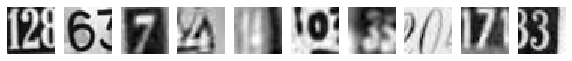

In [89]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train_cat[0:10][i])))
    print(y_train_cat[0:10][i])
plt.show()

In [18]:
y_train_cat.shape

(42000, 10)

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model1 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D 
model1.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model1.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model1.add(tf.keras.layers.Dense(200, activation='relu'))
model1.add(tf.keras.layers.Dense(100, activation='relu'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dropout(0.25))

In [0]:
#Add OUTPUT layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [23]:
model1.fit(X_train,y_train_cat,          
          validation_data=(X_val,y_val_cat),
          epochs=10,
          batch_size=64)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 8s 195us/sample - loss: 1.5641 - accuracy: 0.4845 - val_loss: 1.0049 - val_accuracy: 0.6870
Epoch 2/10
42000/42000 [==============================] - 7s 172us/sample - loss: 1.0259 - accuracy: 0.6788 - val_loss: 0.8540 - val_accuracy: 0.7383
Epoch 3/10
42000/42000 [==============================] - 7s 170us/sample - loss: 0.8870 - accuracy: 0.7245 - val_loss: 0.6788 - val_accuracy: 0.7980
Epoch 4/10
42000/42000 [==============================] - 7s 171us/sample - loss: 0.7860 - accuracy: 0.7550 - val_loss: 0.6382 - val_accuracy: 0.8083
Epoch 5/10
42000/42000 [==============================] - 7s 173us/sample - loss: 0.7221 - accuracy: 0.7771 - val_loss: 0.5813 - val_accuracy: 0.8250
Epoch 6/10
42000/42000 [==============================] - 7s 169us/sample - loss: 0.6760 - accuracy: 0.7898 - val_loss: 0.5722 - val_accuracy: 0.8257
Epoch 7/10
42000/42000 [==========================

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model2 = tf.keras.models.Sequential()

#Reshape data from 2D (32,32) to 3D (32, 32, 1)
model2.add(tf.keras.layers.Reshape((32,32,1),input_shape=(32,32,)))

  #normalize data
  model2.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add first convolutional layer
model2.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [0]:
#Flatten the output
model2.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model2.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model2.add(tf.keras.layers.Dropout(0.25))

#Output layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
model2.fit(X_train,y_train_cat,          
          validation_data=(X_val,y_val_cat),
          epochs=10,
          batch_size=64)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 125s 3ms/sample - loss: 0.8344 - accuracy: 0.7371 - val_loss: 0.4343 - val_accuracy: 0.8744
Epoch 2/10
42000/42000 [==============================] - 123s 3ms/sample - loss: 0.4586 - accuracy: 0.8616 - val_loss: 0.3345 - val_accuracy: 0.9037
Epoch 3/10
42000/42000 [==============================] - 123s 3ms/sample - loss: 0.3711 - accuracy: 0.8866 - val_loss: 0.2808 - val_accuracy: 0.9184
Epoch 4/10
42000/42000 [==============================] - 123s 3ms/sample - loss: 0.3119 - accuracy: 0.9024 - val_loss: 0.2395 - val_accuracy: 0.9317
Epoch 5/10
42000/42000 [==============================] - 124s 3ms/sample - loss: 0.2653 - accuracy: 0.9164 - val_loss: 0.2169 - val_accuracy: 0.9406
Epoch 6/10
42000/42000 [==============================] - 123s 3ms/sample - loss: 0.2309 - accuracy: 0.9269 - val_loss: 0.1939 - val_accuracy: 0.9474
Epoch 7/10
42000/42000 [==========================

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model3 = tf.keras.models.Sequential()

#Reshape data from 2D (32,32) to 3D (32, 32, 1)
model3.add(tf.keras.layers.Reshape((32,32,1),input_shape=(32,32,)))



In [0]:
  #normalize data
  model3.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add first convolutional layer
model3.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model3.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [0]:
#Flatten the output
model3.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model3.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model3.add(tf.keras.layers.Dropout(0.25))

#Output layer
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model3.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
model3.fit(X_train,y_train_cat,          
          validation_data=(X_val,y_val_cat),
          epochs=10,
          batch_size=64)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 124s 3ms/sample - loss: 1.0535 - accuracy: 0.6538 - val_loss: 0.5062 - val_accuracy: 0.8433
Epoch 2/10
42000/42000 [==============================] - 123s 3ms/sample - loss: 0.4900 - accuracy: 0.8499 - val_loss: 0.3647 - val_accuracy: 0.8904
Epoch 3/10
42000/42000 [==============================] - 122s 3ms/sample - loss: 0.3841 - accuracy: 0.8829 - val_loss: 0.2888 - val_accuracy: 0.9172
Epoch 4/10
42000/42000 [==============================] - 123s 3ms/sample - loss: 0.3177 - accuracy: 0.9032 - val_loss: 0.2603 - val_accuracy: 0.9254
Epoch 5/10
42000/42000 [==============================] - 123s 3ms/sample - loss: 0.2666 - accuracy: 0.9177 - val_loss: 0.2236 - val_accuracy: 0.9382
Epoch 6/10
42000/42000 [==============================] - 123s 3ms/sample - loss: 0.2306 - accuracy: 0.9274 - val_loss: 0.2146 - val_accuracy: 0.9413
Epoch 7/10
42000/42000 [==========================

In [84]:
model1.evaluate(x=X_test,y=y_test_cat)

18000/18000 [==============================] - 1s 59us/sample - loss: 0.5418 - accuracy: 0.8369


[0.5417736322879791, 0.8368889]

In [85]:
model2.evaluate(x=X_test,y=y_test_cat)

18000/18000 [==============================] - 10s 549us/sample - loss: 2.3488 - accuracy: 0.0937


[2.3488000859154594, 0.093722224]

In [86]:
model3.evaluate(x=X_test,y=y_test_cat)

18000/18000 [==============================] - 10s 548us/sample - loss: 0.4104 - accuracy: 0.9028


[0.4103955177366734, 0.90283334]

In [0]:
## Model 3 is giving the same accuracy

In [0]:
## 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10.
class_names = ['1', '2','3','4','5','6','7','8','9','10']

In [0]:
predictions1 = model1.predict(X_test)

def plot_image1(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='blue')

def plot_value_array1(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='green')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

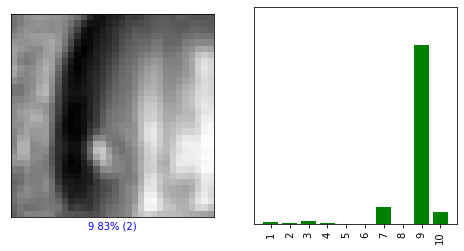

In [128]:
#Replace value of i with other index to check other product
i = 10
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image1(i, predictions1[i], y_train, X_train)
plt.subplot(1,2,2)
plot_value_array1(i, predictions1[i],  y_train)
plt.show()

In [0]:
predictions2 = model2.predict(X_test)

def plot_image2(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='blue')

def plot_value_array2(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='green')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

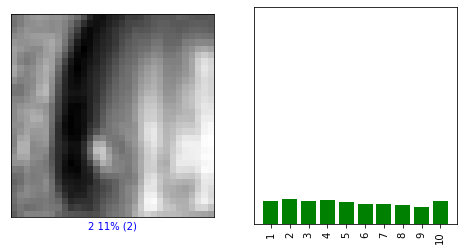

In [130]:
#Replace value of i with other index to check other product
i = 10
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image2(i, predictions2[i], y_train, X_train)
plt.subplot(1,2,2)
plot_value_array2(i, predictions2[i],  y_train)
plt.show()

In [0]:
predictions3 = model3.predict(X_test)

def plot_image3(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='blue')

def plot_value_array3(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='green')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

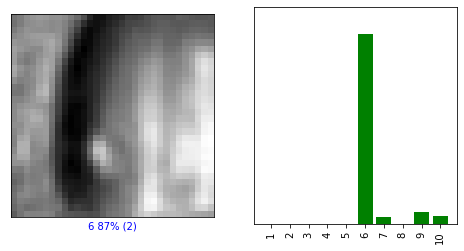

In [132]:
#Replace value of i with other index to check other product
i = 10
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image3(i, predictions3[i], y_train, X_train)
plt.subplot(1,2,2)
plot_value_array3(i, predictions3[i],  y_train)
plt.show()